In [12]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Đường dẫn tới thư mục chứa các file txt ===
folder = "baseline_results"

data = []

for filename in os.listdir(folder):
    if not filename.endswith(".txt"):
        continue

    filepath = os.path.join(folder, filename)

    # Tách tên file theo template model_technique_task
    parts = filename.replace(".txt", "").split("_")
    if len(parts) == 3:
        model, technique, task = parts[0], parts[1], parts[2]
    elif len(parts) == 4:
        model, technique, task = parts[0], parts[1] + "_" + parts[2], parts[3]
    else:
        continue  # Bỏ qua các file không đúng định dạng

    with open(filepath, "r", encoding="utf-8") as f:
        content = f.read()

    # --- Phân loại loại kết quả ---
    if "accuracy" in content or "precision" in content:  # classification_report
        # Tìm accuracy trong phần báo cáo
        match = re.search(r"accuracy\s+([\d\.]+)", content)
        accuracy = float(match.group(1)) if match else None
        data.append({
            "model": model,
            "technique": technique,
            "task": task,
            "metric": "accuracy",
            "value": accuracy
        })

    elif "MAE" in content:  # regression result
        match = re.search(r"MAE[:\s]+([\d\.]+)", content)
        mae = float(match.group(1)) if match else None
        data.append({
            "model": model,
            "technique": technique,
            "task": task,
            "metric": "MAE",
            "value": mae
        })

# === Tạo DataFrame tổng hợp ===
df = pd.DataFrame(data)
print(df)

# === Lưu lại nếu cần ===
df.to_csv("summary_results.csv", index=False)


   model technique      task    metric     value
0    KNN  int_anon   avgpcon       MAE   29.3223
1    KNN  int_anon  duration       MAE  269.4651
2    KNN  int_anon        ec  accuracy    0.8100
3    KNN  int_anon    pclass  accuracy    0.7800
4    KNN   sb_anon   avgpcon       MAE   24.3645
5    KNN   sb_anon  duration       MAE  312.2561
6    KNN   sb_anon        ec  accuracy    0.8800
7    KNN   sb_anon    pclass  accuracy    0.6800
8    KNN        sb   avgpcon       MAE   47.1806
9    KNN        sb  duration       MAE  219.3296
10   KNN        sb        ec  accuracy    0.7200
11   KNN        sb    pclass  accuracy    0.7400
12    RF  int_anon   avgpcon       MAE   24.3255
13    RF  int_anon  duration       MAE  298.0089
14    RF  int_anon        ec  accuracy    0.7300
15    RF  int_anon    pclass  accuracy    0.7400
16    RF   sb_anon   avgpcon       MAE   31.8202
17    RF   sb_anon  duration       MAE  382.9807
18    RF   sb_anon        ec  accuracy    0.8900
19    RF   sb_anon  

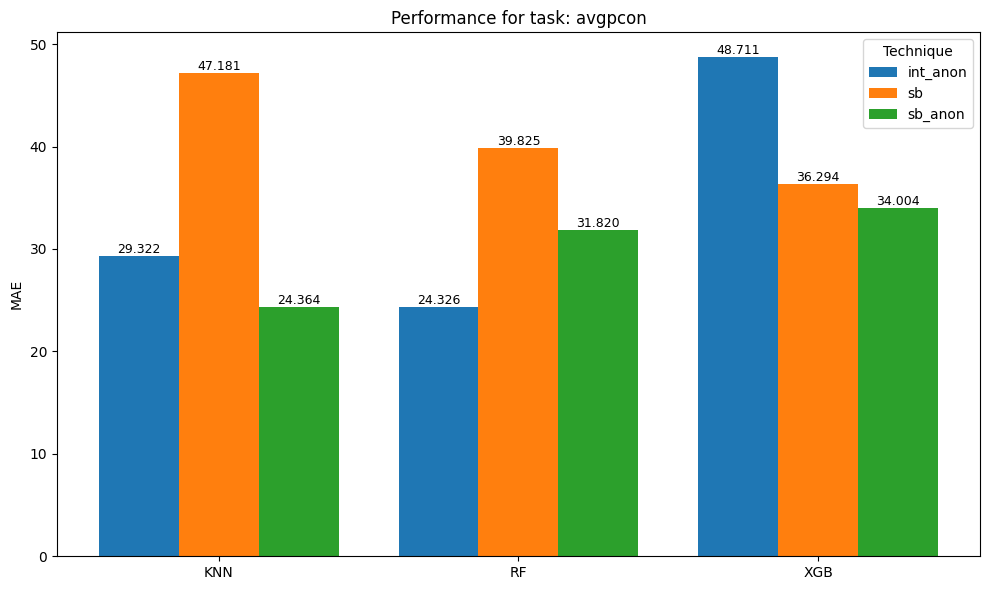

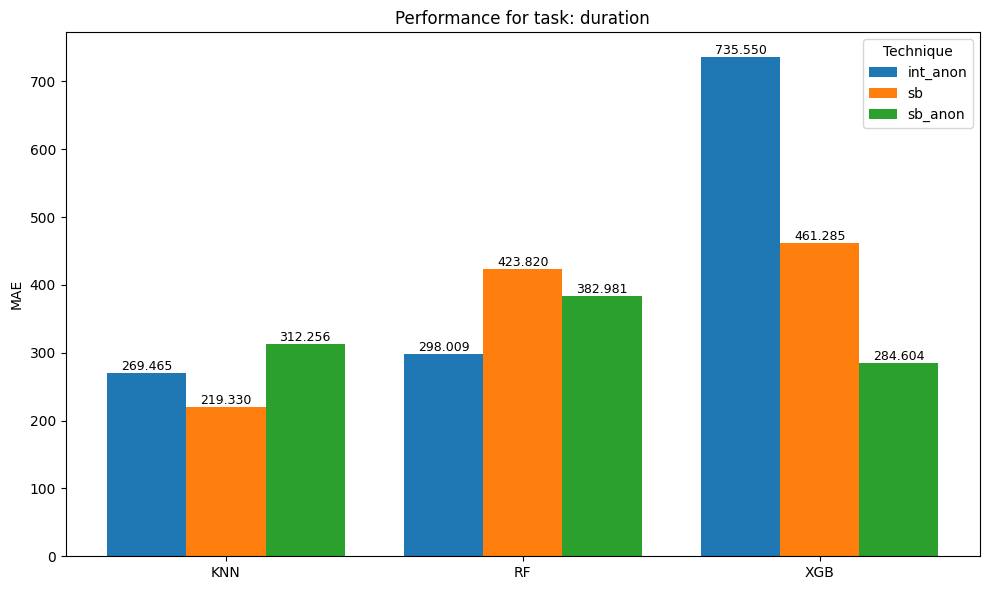

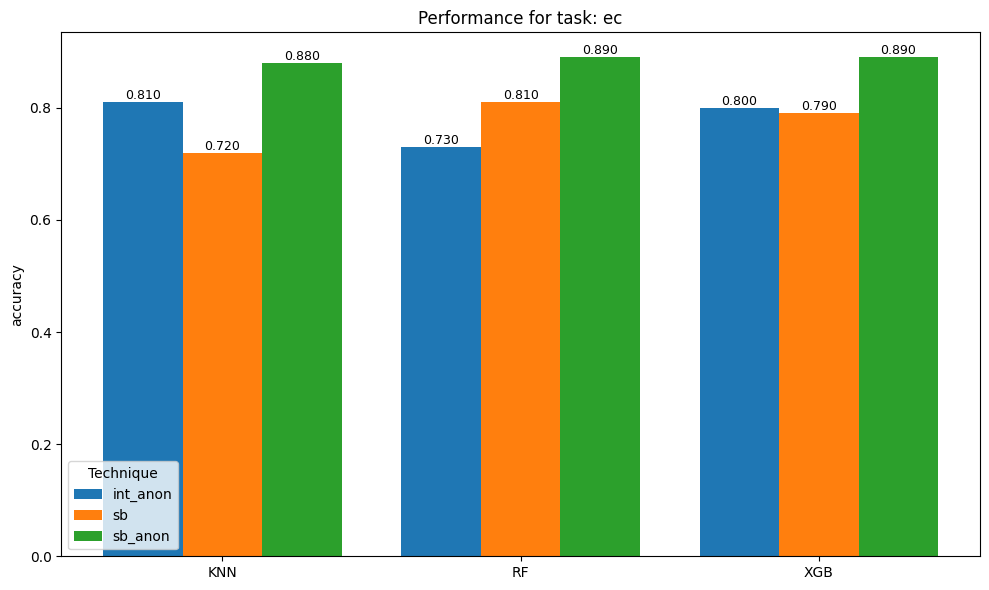

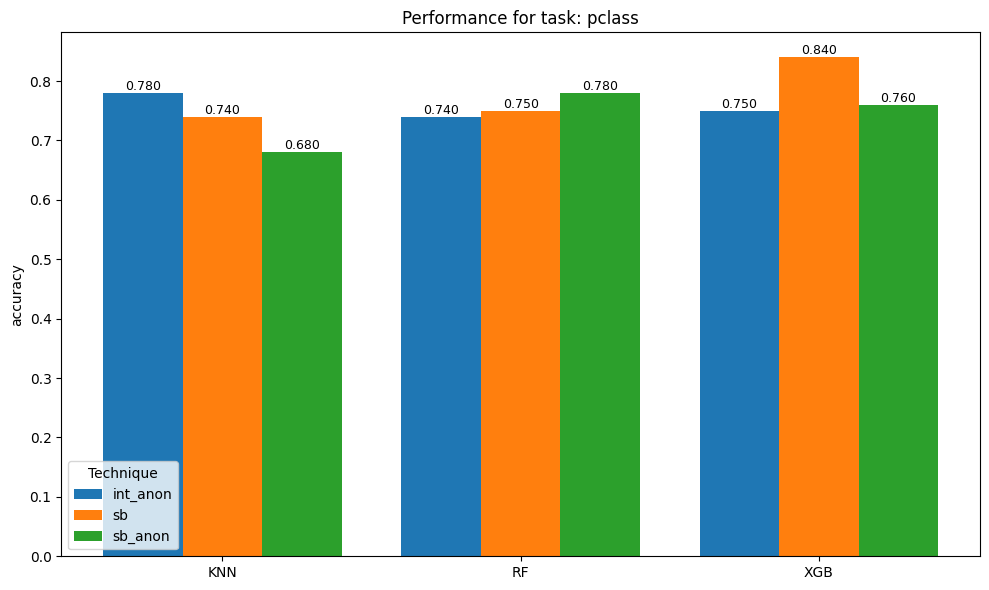

In [13]:
import matplotlib.pyplot as plt
import numpy as np

for task in df["task"].unique():
    subset = df[df["task"] == task].sort_values(["model", "technique"])

    models = subset["model"].unique()
    techniques = subset["technique"].unique()

    x = np.arange(len(models))
    width = 0.8 / len(techniques)  # chia đều cột theo số technique

    plt.figure(figsize=(10, 6))

    # Vẽ từng technique
    for i, tech in enumerate(techniques):
        sub_t = subset[subset["technique"] == tech]
        values = sub_t["value"].to_numpy()
        positions = x + (i - len(techniques)/2) * width + width/2
        bars = plt.bar(positions, values, width, label=tech)

        # Gắn nhãn giá trị
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2,
                height,
                f"{height:.3f}",
                ha="center", va="bottom", fontsize=9
            )

    plt.xticks(x, models, rotation=0)
    plt.title(f"Performance for task: {task}")
    plt.ylabel(subset["metric"].iloc[0])
    plt.legend(title="Technique")
    plt.tight_layout()
    plt.show()
